# TENSORS

A tensor is an N-dimensional matrix, which also means that scalars and vectors are special cases of N-dimensional tensors:

- A scalar is a 0-dimension tensor
- A vector is a 1-D tensor
- A matrix is a 2-D tensor
![scalar - tensor](https://hadrienj.github.io/assets/images/2.1/scalar-vector-matrix-tensor.png)

Image source: [source](hadrienj.github.io)

Tensors generalize these concepts to more dimensions, making them a powerful tool for handling data in areas like machine learning, physics, and engineering.

An example of a Tensor: A collection of 100 color images, where each image has 3 layers (red, green, blue) and is 200 pixels by 200 pixels

Let us use one color image from the 100 for example: the shape will be: __Tensor(3, 200, 200)__: 3 color images, the height of the image is 200 pixels, the width is also 200 pixels. In code:

```python
import numpy as np
image = np.random.randint(0, 256, (3, 200,200), dtype=np.uint8)
```



Tensors can live in the CPU or on the GPU and can be copied between devices
by using the to() function:

In [2]:
import torch
tensor = torch.zeros(2,3)
print(tensor)
print(tensor.device)
gpu = tensor.to('cuda')
print(gpu.device)

tensor([[0., 0., 0.],
        [0., 0., 0.]])
cpu
cuda:0


## Imports

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import torch

## TENSOR EXAMPLE

In [1]:
import numpy as np

# Shape: (3 channels, 200 height, 200 width)
image_tensor = np.random.randint(0, 256, (3, 200, 200), dtype=np.uint8)

# Example of shape and tensor
print("Tensor shape:", image_tensor.shape)  # Output: (3, 200, 200)


Tensor shape: (3, 200, 200)


To visualize the above image:

__N/B:__ The reason we need to transpose the tensor is because image display libraries, such as Matplotlib, expect image data in the format where the color channels are the last dimension of the tensor, not the first.

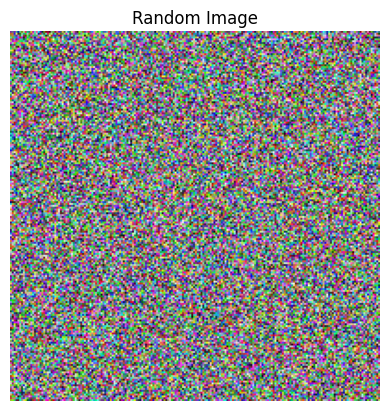

In [5]:
import matplotlib.pyplot as plt

image = np.transpose(image_tensor, (1,2,0)) # this changes the shape to (200, 200, 3 - height, width, channels), why?  this is the image format
plt.imshow(image)
plt.axis("off")
plt.title("Random Image")
plt.show()

We are going to plot the channels differently so you see how they are before they are blended together:

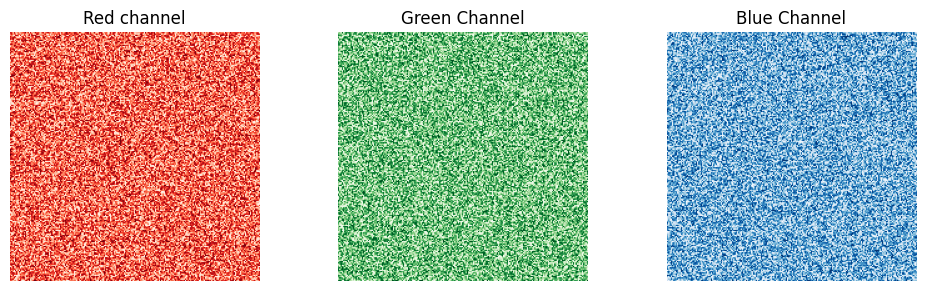

In [11]:
# extracting individual channels : RGB
red = image[:,:,0]
green = image[:,:,1]
blue = image[:,:,2]

plt.figure(figsize=(10,3))
plt.subplot(1,3,1)
plt.imshow(red, cmap="Reds")
plt.title("Red channel")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(green, cmap="Greens")
plt.title("Green Channel")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(blue, cmap = "Blues")
plt.title("Blue Channel")
plt.axis("off")

plt.tight_layout()
plt.show()

The pixels causing the above colors can also be displayed, by changing the cmaps to gray scale

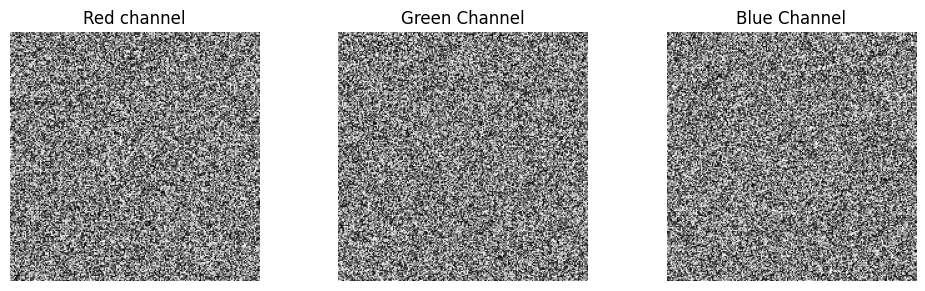

In [12]:
plt.figure(figsize=(10,3))
plt.subplot(1,3,1)
plt.imshow(red, cmap="gray")
plt.title("Red channel")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(green, cmap="gray")
plt.title("Green Channel")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(blue, cmap = "gray")
plt.title("Blue Channel")
plt.axis("off")

plt.tight_layout()
plt.show()

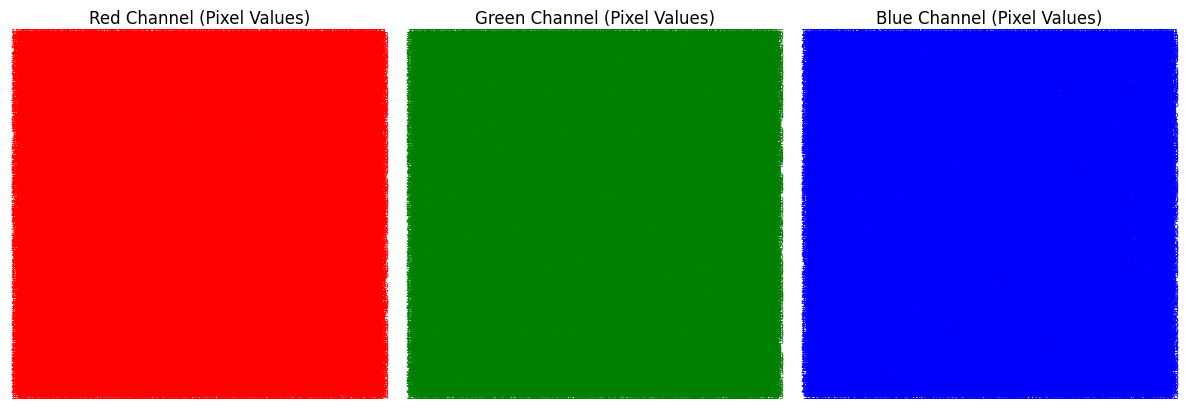

In [14]:
# # Plot the Red channel pixel values
# plt.figure(figsize=(12, 4))
# plt.subplot(1, 3, 1)
# plt.imshow(red, cmap='gray', interpolation='nearest')
# for (i, j), val in np.ndenumerate(red):
#     plt.text(j, i, str(val), ha='center', va='center', color='red', fontsize=6)
# plt.title("Red Channel (Pixel Values)")
# plt.axis('off')

# # Plot the Green channel pixel values
# plt.subplot(1, 3, 2)
# plt.imshow(green, cmap='gray', interpolation='nearest')
# for (i, j), val in np.ndenumerate(green):
#     plt.text(j, i, str(val), ha='center', va='center', color='green', fontsize=6)
# plt.title("Green Channel (Pixel Values)")
# plt.axis('off')

# # Plot the Blue channel pixel values
# plt.subplot(1, 3, 3)
# plt.imshow(blue, cmap='gray', interpolation='nearest')
# for (i, j), val in np.ndenumerate(blue):
#     plt.text(j, i, str(val), ha='center', va='center', color='blue', fontsize=6)
# plt.title("Blue Channel (Pixel Values)")
# plt.axis('off')

# # Show the plots
# plt.tight_layout()
# plt.show()


We have been able to do this by manipulating Tensors

## MANIPULATING TENSORS



### Creating Tensors from a list

You can convert a python list, or numpy array into a tensor:

In [25]:
data = [[10,20], [30,40]]
print(type(data))
print(data)
ndarray = np.array(data)
print(type(ndarray))
print(ndarray)
tensor = torch.tensor(data)
print(type(tensor))
print(tensor)
tensor = torch.tensor(ndarray)
print(type(tensor))
print(tensor)

<class 'list'>
[[10, 20], [30, 40]]
<class 'numpy.ndarray'>
[[10 20]
 [30 40]]
<class 'torch.Tensor'>
tensor([[10, 20],
        [30, 40]])
<class 'torch.Tensor'>
tensor([[10, 20],
        [30, 40]])


### Creating Tensors with Specific Values

- Zeros Tensor: A tensor filled with zeros.
- Ones Tensor: A tensor filled with ones.
- Constant Tensor: A tensor with a specified constant value.

In [28]:
zeros = torch.zeros(2,3) # creates a 2 by 3 matrix filled with zeros
print(zeros)
ones = torch.ones(2,3) # creates a 2 by 3 matrix filled with ones
print(ones)
constant = torch.full((2,3), 8) # creates a 2 by 3 matrix filled with 8's
print(constant)

tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[8, 8, 8],
        [8, 8, 8]])


### Creating Random Tensors

Random tensors are useful for initialization in deep learning.

In [30]:
random_tensor = torch.rand(3, 3)  # Uniformly distributed [0, 1)
print(random_tensor)
random_int_tensor = torch.randint(0, 100, (3, 3))  # Random integers between 0, 100
print(random_int_tensor)

tensor([[0.9877, 0.8232, 0.3792],
        [0.3832, 0.0669, 0.8298],
        [0.3637, 0.3760, 0.4172]])
tensor([[79,  9, 95],
        [17, 77, 13],
        [51,  0, 97]])


### Identity and Diagonal Tensors

In [31]:
identity = np.eye(3)  # 3x3 identity matrix
print(identity)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


## COMMON TENSOR OPERATION FUNCTIONS

### MAX()

Returns the maximum value in a tensor, it can operate in the entire tensor, or a long a certain dimension

```python
torch.max(input, dim=None, keepdim=False)
```

1. input -  is the input tensor
2. dim (optional param) - dimension along which to find the maximum
3. keepdim - if True, retains the reduced dimension with size 1 in the output tensor.

In [8]:
tensor = torch.tensor([[1,2,6],[3,5,4]])
maxValue = torch.max(tensor)
print(maxValue) # returns the specific tensor
maxValue, maxIndices = torch.max(tensor, dim=1) # returns the maximum along the rows, for every row, it returns a max, and the row in which it is located, dim = 0, is along the columns
print(maxValue, maxIndices)

tensor(6)
tensor([3, 5, 6]) tensor([1, 1, 0])


### argmax

In PyTorch, the `argmax()` function is used to find the index of the maximum value in a tensor along a specified dimension. If no dimension is specified, it finds the index of the maximum value in the flattened tensor.

```python
torch.argmax(input, dim=None, keepdim=False)
```
with `argmax` you get the index location of the maximum index.

In [13]:
tensor = torch.tensor([[6, 2, 3], [4, 5, 1]])
max_index = torch.argmax(tensor)  # Finds index of max value in flattened tensor
print(max_index)  # Output: tensor(0) (index of 6 in flattened tensor)
import torch

# with dimensions, you retain the shape, without dim param, the tensor is flattened
tensor = torch.tensor([[1, 3, 2], [4, 5, 6]])
max_indices = torch.argmax(tensor, dim=1)  # Find indices of max along rows
print(max_indices)  # Output: tensor([1, 2]) (indices of max values in rows)


tensor(0)
tensor([1, 2])


### view() & reshape()

__N/B:__ contiguous: sharing a common border; touching, next or together in sequence. In pytorch, it means the tensors are assigned sequential memory indexes. To check if a tensor is contiguous, you use the `.is_contiguous()`:
```python
tensor.is_contiguous()
```
To make a tensor contiguous, you use the `.contiguous()` method:
```python
tensor.contigous()
```

`view()` is used to reshape tensors. It returns a new tensor with the same data as the original tensor but with different shape. The data in the tensor remains unchanged, but the dimensions are rearranged according to the shape you specify. It cannot whoever handle __non-contiguous__ tensor

if you want to flattened a tensor you can also use `.view()`
```python
tensor.view(-1)
```

In [17]:
tensor = torch.tensor([[1, 2, 3], [4, 5, 6]]) # shape here is 2 rows, 3 columns
print(tensor.shape)
print(tensor)
reshaped = tensor.view(3, 2)  # Reshapes to 3 rows, 2 columns
print(reshaped.shape)
print(reshaped)

torch.Size([2, 3])
tensor([[1, 2, 3],
        [4, 5, 6]])
torch.Size([3, 2])
tensor([[1, 2],
        [3, 4],
        [5, 6]])


`reshape()` basically does the same as `view()`, the only difference is that it can handle __non-contiguous__ data. You can also use `reshape()` to flatten a tensor:
```python
tensor.reshape(-1)
```

In [18]:
reshaped = tensor.reshape(3,2)
print(reshaped.shape)
print(reshaped)

torch.Size([3, 2])
tensor([[1, 2],
        [3, 4],
        [5, 6]])


### permute()

Permute is normally used to rearrange the dimensions of the a tensor in a specified order without changing the data
```python
tensor.permute(dims)

```

In [23]:
tensor = torch.rand(2,3,5)
print(tensor.shape)
permute = tensor.permute(2,0,1)
print(permute.shape)

torch.Size([2, 3, 5])
torch.Size([5, 2, 3])


### Tensor Broadcasting